Objective: To create a mathematical model that can predict the behavior or response of a servo system based on input variables

Data Source: Github

A servo, short for servomechanism, is a device used to provide precise control of angular or linear position, velocity, and acceleration. It typically includes:

1. **Motor**: This can be either DC or AC, and it generates the motion.
2. **Control Circuit**: It receives input signals and controls the motor accordingly to achieve the desired position or speed.
3. **Feedback Mechanism**: Often a potentiometer or encoder that provides feedback on the current position or speed of the motor.
4. **Drive**: Converts control signals into power for the motor.

Servos are commonly used in applications requiring precise control, such as in robotics, manufacturing, and remote-controlled vehicles.

Import Libraries

In [1]:
import pandas as pd

Import csv file as dataframe

In [4]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Get Summary Statistics

In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Get Information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Get column names

In [8]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

Get shape of dataframe

In [9]:
df.shape

(167, 5)

Get category and counts of categorical variables

In [10]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [11]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

Get encoding of categorical variables

In [12]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


Define y(dependent/target variable) and x(independent/attribute variable)

In [13]:
y=df['Class']

In [14]:
y.shape

(167,)

In [15]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [16]:
x=df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [20]:
x=df.drop('Class',axis=1)

In [21]:
x.shape

(167, 4)

In [22]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

Model Training

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Model Prediction

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred.shape

(51,)

In [33]:
y_pred

array([ 22.20723254,  27.79373855,  25.155679  ,  19.03928   ,
        20.75085226,  40.83364183,  46.59780586,  23.62176476,
        18.07402574,   7.98565   ,  23.52472177,   9.34190621,
        26.39563428,  35.5023278 ,   1.15918871,  32.37622331,
        14.88964524,  14.67322023,  33.47728755,  24.939254  ,
        31.98214029,  11.68292572,  14.45679523,  43.82393634,
        24.05461477,  22.16538448,  39.24145158,  28.14597352,
        12.11577572, -12.80469059,   9.26437225,   3.50020822,
        -1.35697756,  16.26541048,  17.72179076,  14.85087826,
         9.48079726, -20.16104487,  19.255705  ,  13.70796597,
         9.40018222,  41.05006683,   7.84675895,  29.20827077,
        39.33849457,  17.66351475,  13.17807298,  27.89078154,
         5.21178048,  23.30829677,   3.93305823])

Model Evaluation

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(y_test,y_pred)


96.75334708937615

In [35]:
mean_absolute_error(y_test,y_pred)

7.649447838372802

In [36]:
r2_score(y_test,y_pred)

0.4797389845579637

Visualization of Actual vs Predicted Results

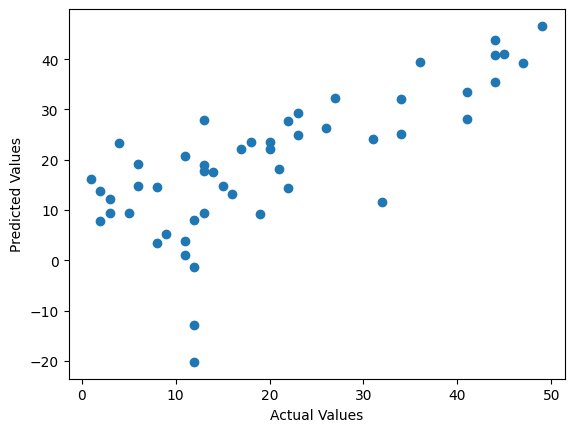

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Future Predictions

In [43]:
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred))

9.836327927096379

In [38]:
x_new=df.sample(1)
x_new

,Motor,Screw,Pgain,Vgain,Class
79,4,3,3,2,34


In [39]:
x_new.shape

(1, 5)

In [40]:
x_new=x_new.drop('Class',axis=1)
x_new

,Motor,Screw,Pgain,Vgain
79,4,3,3,2


In [41]:
x_new.shape

(1, 4)

In [42]:
y_pred_new=model.predict(x_new)
y_pred_new

array([32.29560828])